Example of the use of the eFEL (eFeature Extraction Library) in conjunction with models downloaded from the Neocortical Microcircuit Portal website

Requirements:
- Python 3.8+, including Pip (https://pip.readthedocs.org)
- A version of Neuron (with Python support) installed on your computer (for instruction, see https://bbp.epfl.ch/nmc-portal/tools)

Make matplotlib plots show up in the notebook: 

In [1]:
%matplotlib inline

Install the eFeature Extraction Library:

In [2]:
!pip install efel
import efel

Get a model package from the website

In [13]:
!curl -o L5_TTPC2.zip https://bbp.epfl.ch/nmc-portal/assets/documents/static/downloads-zip/L5_TTPC2_cADpyr232_1.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1865k  100 1865k    0     0  2493k      0 --:--:-- --:--:-- --:--:-- 2511k


Unzip the model package:

In [14]:
!unzip L5_TTPC2.zip

Archive:  L5_TTPC2.zip
 extracting: L5_TTPC2_cADpyr232_1/mosinit.hoc  
 extracting: L5_TTPC2_cADpyr232_1/VERSION  
   creating: L5_TTPC2_cADpyr232_1/morphology/
 extracting: L5_TTPC2_cADpyr232_1/morphology/dend-C060114A7_axon-C060116A3_-_Clone_2.asc  
 extracting: L5_TTPC2_cADpyr232_1/README  
 extracting: L5_TTPC2_cADpyr232_1/run_RmpRiTau_py.sh  
 extracting: L5_TTPC2_cADpyr232_1/init.hoc  
 extracting: L5_TTPC2_cADpyr232_1/morphology.hoc  
 extracting: L5_TTPC2_cADpyr232_1/current_amps.dat  
 extracting: L5_TTPC2_cADpyr232_1/LICENSE  
   creating: L5_TTPC2_cADpyr232_1/python_recordings/
 extracting: L5_TTPC2_cADpyr232_1/python_recordings/.placeholder  
   creating: L5_TTPC2_cADpyr232_1/mechanisms/
 extracting: L5_TTPC2_cADpyr232_1/mechanisms/ProbGABAAB_EMS.mod  
 extracting: L5_TTPC2_cADpyr232_1/mechanisms/SKv3_1.mod  
 extracting: L5_TTPC2_cADpyr232_1/mechanisms/Ih.mod  
 extracting: L5_TTPC2_cADpyr232_1/mechanisms/Ca_HVA.mod  
 extracting: L5_TTPC2_cADpyr232_1/mechanisms/ProbAMPANM

Change directory to the model package directory:

In [15]:
import os
os.chdir('L5_TTPC2_cADpyr232_1')

Compile the Neuron mechanisms (if this fails, you might not have installed Neuron correctly)

In [16]:
!nrnivmodl ./mechanisms

/usr/bin/xcrun
/Users/ikilic/workspace/eFEL/examples/nmc-portal/L5_TTPC2_cADpyr232_1
Mod files: "./mechanisms/./mechanisms/CaDynamics_E2.mod" "./mechanisms/./mechanisms/Ca_HVA.mod" "./mechanisms/./mechanisms/Ca_LVAst.mod" "./mechanisms/./mechanisms/Ih.mod" "./mechanisms/./mechanisms/Im.mod" "./mechanisms/./mechanisms/K_Pst.mod" "./mechanisms/./mechanisms/K_Tst.mod" "./mechanisms/./mechanisms/NaTa_t.mod" "./mechanisms/./mechanisms/NaTs2_t.mod" "./mechanisms/./mechanisms/Nap_Et2.mod" "./mechanisms/./mechanisms/ProbAMPANMDA_EMS.mod" "./mechanisms/./mechanisms/ProbGABAAB_EMS.mod" "./mechanisms/./mechanisms/SK_E2.mod" "./mechanisms/./mechanisms/SKv3_1.mod"

Creating 'arm64' directory for .o files.

 -> NMODL .././mechanisms/Ca_LVAst.mod
 -> NMODL .././mechanisms/Ca_HVA.mod
 -> Compiling mod_func.cpp
 -> NMODL .././mechanisms/CaDynamics_E2.mod
Translating CaDynamics_E2.mod into /Users/ikilic/workspace/eFEL/examples/nmc-portal/L5_TTPC2_cADpyr232_1/arm64/CaDynamics_E2.c
Translating Ca_LVAst.mo

Import the model package in Python, and run it:

--No graphics will be displayed.


Loading constants
Setting temperature to 34.000000 C
Setting simulation time step to 0.025000 ms
	1 
	1 
	1 
Loading cell cADpyr232_L5_TTPC2_8052133265
Attaching stimulus electrodes
Setting up step current clamp: amp=0.593063 nA, delay=700.000000 ms, duration=2000.000000 ms
Setting up hypamp current clamp: amp=-0.286011 nA, delay=0.000000 ms, duration=3000.000000 ms
Attaching recording electrodes
Setting simulation time to 3s for the step currents
Disabling variable timestep integration
Running for 3000.000000 ms
Soma voltage for step 1 saved to: python_recordings/soma_voltage_step1.dat
Loading cell cADpyr232_L5_TTPC2_8052133265
Attaching stimulus electrodes
Setting up step current clamp: amp=0.642485 nA, delay=700.000000 ms, duration=2000.000000 ms
Setting up hypamp current clamp: amp=-0.286011 nA, delay=0.000000 ms, duration=3000.000000 ms
Attaching recording electrodes
Setting simulation time to 3s for the step currents
Disabling variable timestep integration
Running for 3000.000000

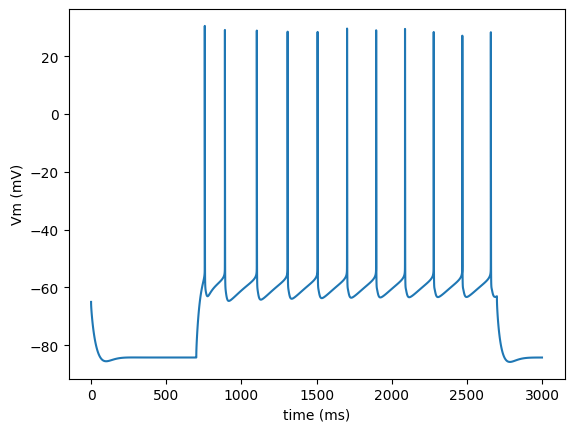

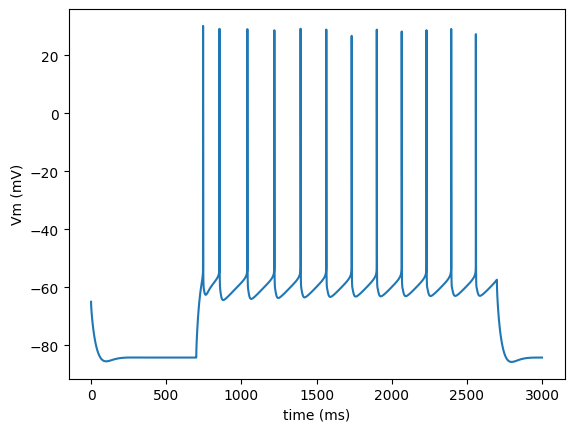

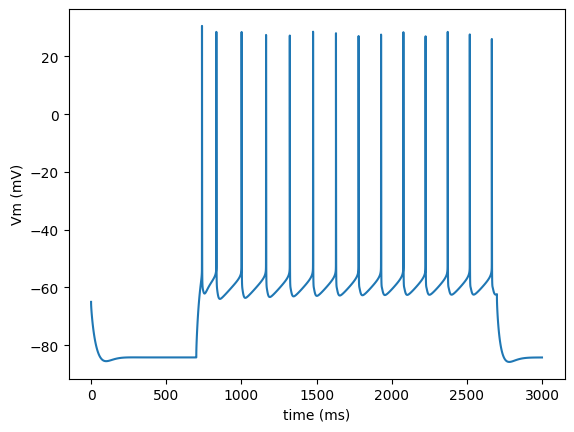

In [17]:
import run
run.main(plot_traces=True)

Load the output of the model package in numpy array

In [18]:
import numpy
times = []
voltages = []
for step_number in range(1,4):
    data = numpy.loadtxt('python_recordings/soma_voltage_step%d.dat' % step_number)
    times.append(data[:, 0])
    voltages.append(data[:, 1])

Prepare the traces for the eFEL

In [19]:
traces = []
for step_number in range(3):
    trace = {}
    trace['T'] = times[step_number]
    trace['V'] = voltages[step_number]
    trace['stim_start'] = [700]
    trace['stim_end'] = [2700]
    traces.append(trace)

Run the eFEL on the trace

In [20]:
feature_values = efel.getFeatureValues(traces, ['mean_frequency', 'adaptation_index2', 'ISI_CV', 'doublet_ISI', 'time_to_first_spike', 'AP_height', 'AHP_depth_abs', 'AHP_depth_abs_slow', 'AHP_slow_time', 'AP_width', 'peak_time'])

Plot frequencies over steps

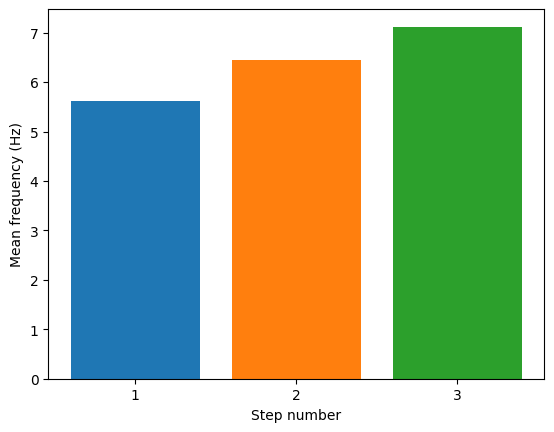

In [21]:
import pylab
for step_number in range(3):
    pylab.bar(step_number, feature_values[step_number]['mean_frequency'][0], align='center')
pylab.ylabel('Mean frequency (Hz)')
pylab.xlabel('Step number')
pylab.xticks(range(3), range(1,4))
pylab.show()

Plot AP height and AHP depth

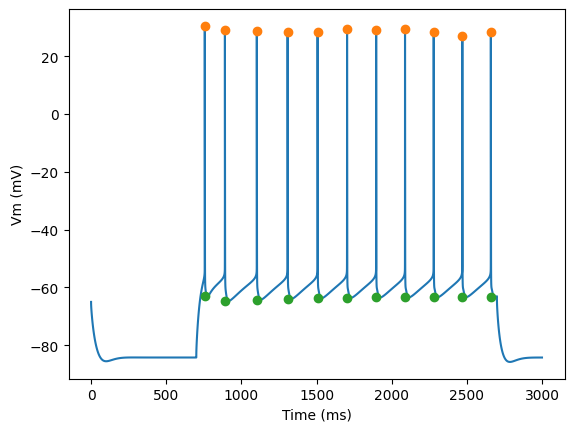

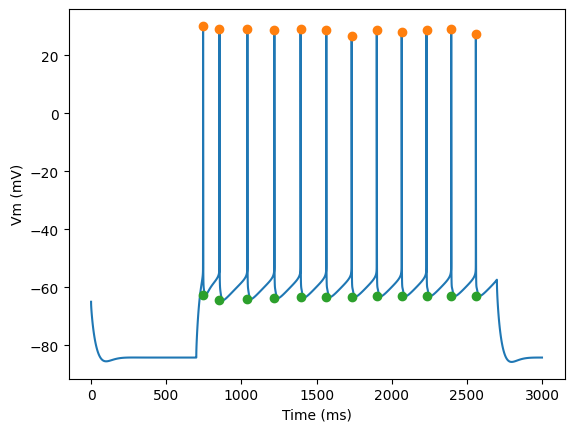

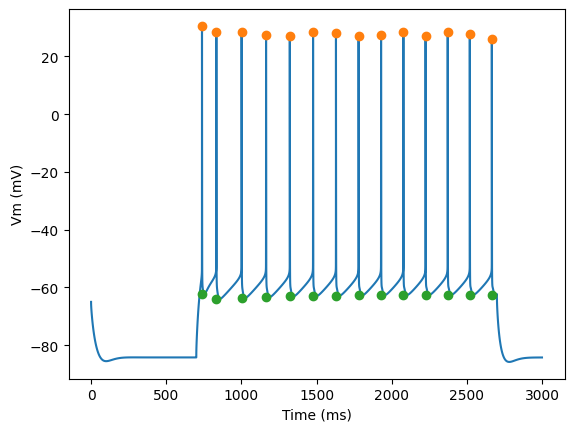

In [22]:
for step_number in range(3):
    time = times[step_number]
    voltage = voltages[step_number]
    peak_times = feature_values[step_number]['peak_time']
    ap_heights = feature_values[step_number]['AP_height']
    AHP_depth_abss = feature_values[step_number]['AHP_depth_abs']
    
    pylab.plot(time,voltage)
    pylab.plot(peak_times, ap_heights, 'o')
    pylab.plot(peak_times, AHP_depth_abss, 'o')
    pylab.xlabel('Time (ms)')
    pylab.ylabel('Vm (mV)')
    pylab.show()